In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('loan_approval_dataset.csv')

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# Handling Missing Value

In [6]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

# outliers treatment

In [7]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


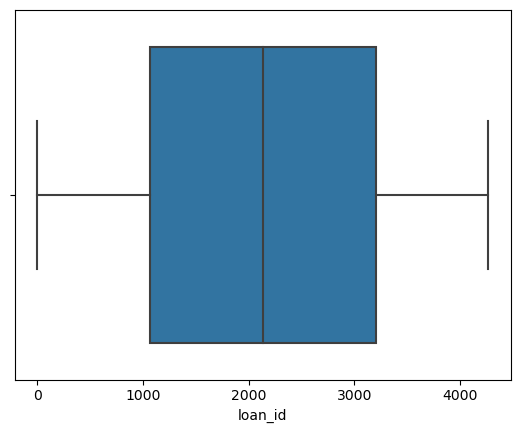

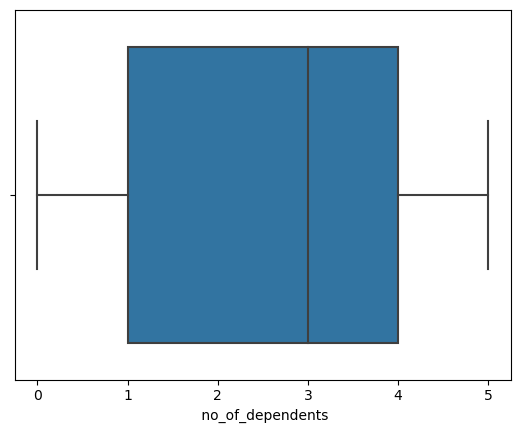

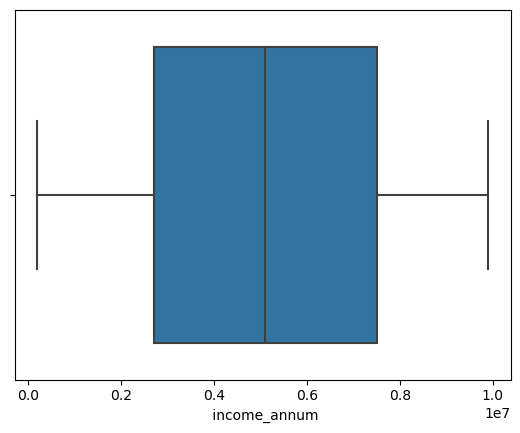

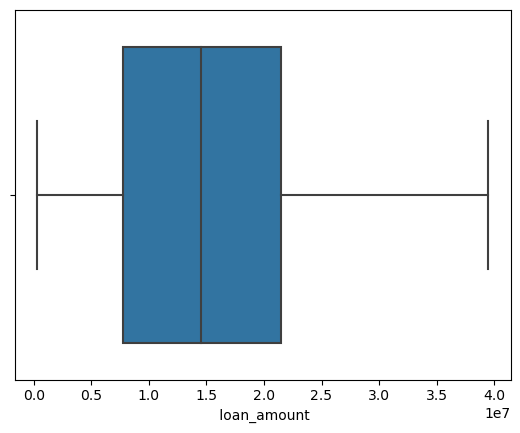

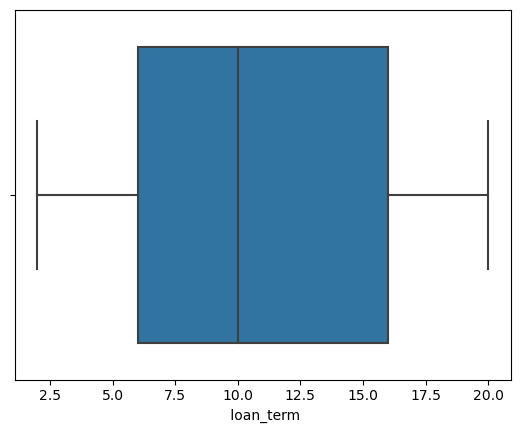

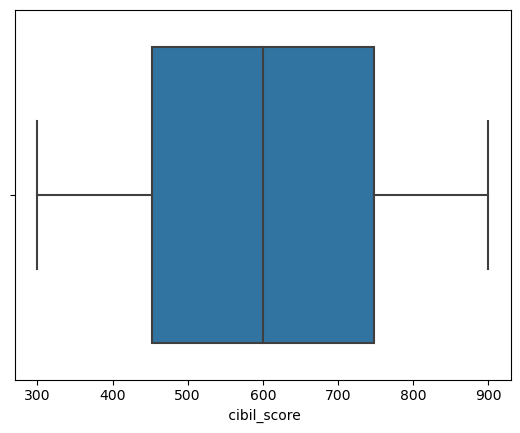

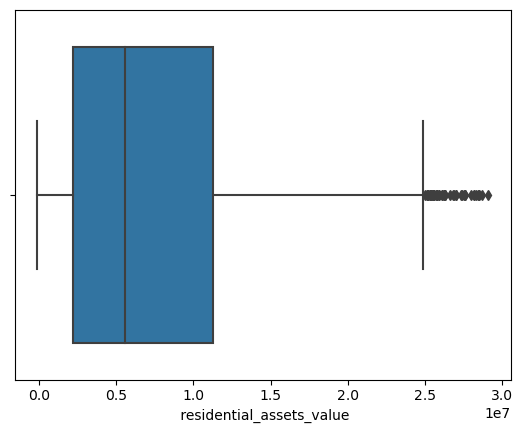

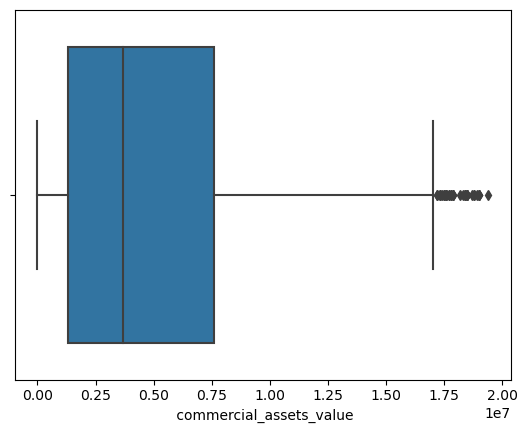

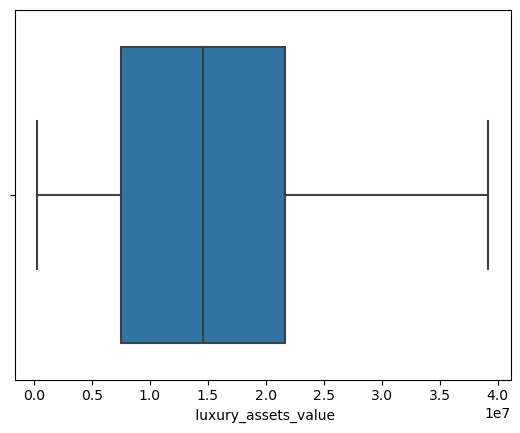

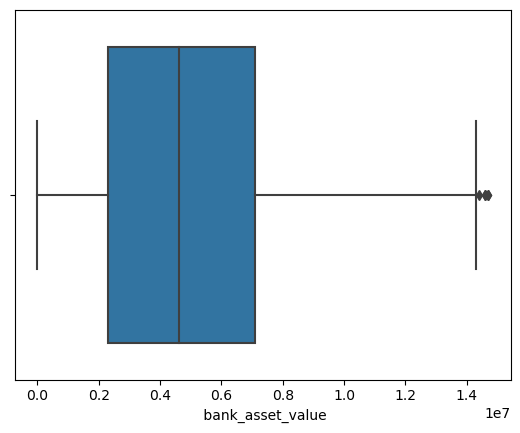

In [8]:
for i in data.select_dtypes(include=['int','float']):
    sns.boxplot(data=data,x=i)
    plt.show()

In [9]:
def outliers_treatment(col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1
    UB=q3+1.5*IQR
    LB=q1-1.5*IQR
    upper_outlier=data[col] > UB
    lower_outlier=data[col] < LB
    data.loc[upper_outlier,col]=data[col].median()
    data.loc[lower_outlier,col]=data[col].median()

In [10]:
outliers_treatment(' commercial_assets_value')

In [11]:
outliers_treatment(' residential_assets_value')

# Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
LE=LabelEncoder()
LE

LabelEncoder()

In [14]:
def HCD (col):
    data[col]=LE.fit_transform(data[[col]])

In [15]:
for i in data.select_dtypes(include='object'):
    HCD (i)

C:\Users\adity\anaconda3\New folder\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adity\anaconda3\New folder\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adity\anaconda3\New folder\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
data.head(1)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,3700000,22700000,8000000,0


In [17]:
data.corr()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,1.000000,0.005326,-0.015536,0.001745,0.012592,0.008170,0.009809,0.016323,0.020031,0.022222,-0.000862,0.010765,-0.017685
no_of_dependents,0.005326,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.009162,-0.002331,0.002817,0.011163,0.018114
education,-0.015536,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,-0.018102,-0.000371,-0.012471,-0.009424,0.004918
self_employed,0.001745,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.008807,-0.022759,0.004413,-0.000215,-0.000345
income_annum,0.012592,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.610411,0.619526,0.929145,0.851093,0.015189
loan_amount,0.008170,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.579440,0.581449,0.860914,0.788122,-0.016150
loan_term,0.009809,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.003678,-0.009262,0.012490,0.017177,0.113036
cibil_score,0.016323,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.025993,0.003095,-0.028618,-0.015478,-0.770518
residential_assets_value,0.020031,0.009162,-0.018102,0.008807,0.610411,0.579440,0.003678,-0.025993,1.000000,0.397293,0.572270,0.505140,0.018211
commercial_assets_value,0.022222,-0.002331,-0.000371,-0.022759,0.619526,0.581449,-0.009262,0.003095,0.397293,1.000000,0.577108,0.526506,-0.016788


<Axes: >

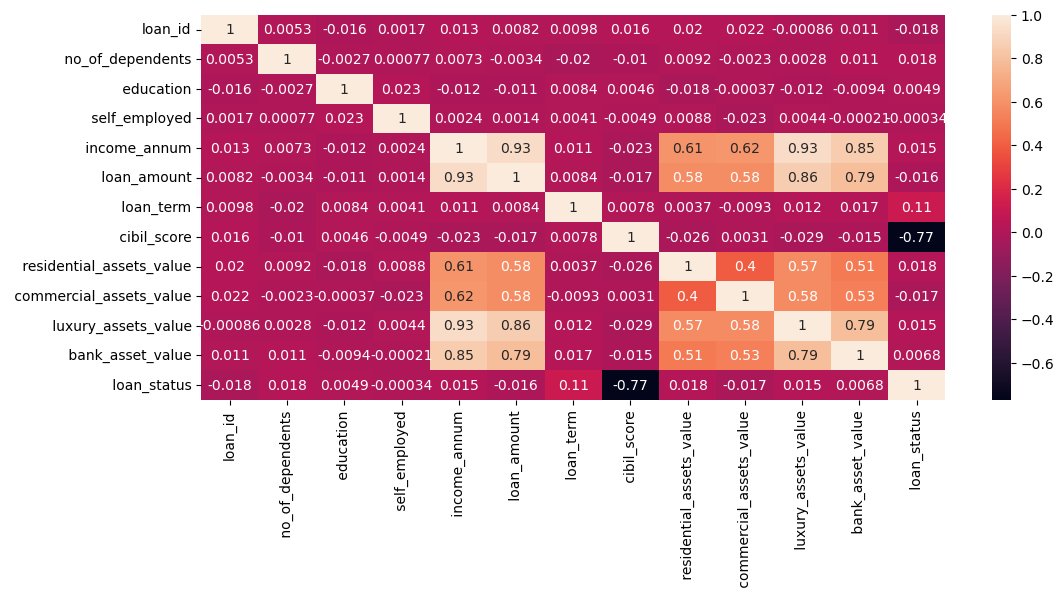

In [113]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),annot=True)

In [19]:
x=data.drop([' loan_status'], axis=1)

In [20]:
x.head(2)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,0,0,9600000,29900000,12,778,2400000,3700000,22700000,8000000
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000


In [21]:
y=data[' loan_status']

In [22]:
y.head(2)

0    0
1    1
Name:  loan_status, dtype: int32

In [23]:
data.skew()

loan_id                      0.000000
 no_of_dependents           -0.017971
 education                   0.008905
 self_employed              -0.014529
 income_annum               -0.012814
 loan_amount                 0.308724
 loan_term                   0.036359
 cibil_score                -0.009039
 residential_assets_value    0.918472
 commercial_assets_value     0.907465
 luxury_assets_value         0.322208
 bank_asset_value            0.560725
 loan_status                 0.504087
dtype: float64

In [24]:
from sklearn.preprocessing import PowerTransformer

In [25]:
pt=PowerTransformer()

In [26]:
pt

PowerTransformer()

In [27]:
x=pt.fit_transform(x)

### Train_test_split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [30]:
x_train.shape

(3415, 12)

In [31]:
x_test.shape

(854, 12)

In [32]:
y_train.shape

(3415,)

In [33]:
y_test.shape

(854,)

# LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
LR=LogisticRegression(max_iter=100)

In [36]:
LR

LogisticRegression()

In [37]:
LR.fit(x_train,y_train)

LogisticRegression()

In [38]:
model_pred=LR.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [40]:
confusion_matrix(y_test,model_pred)

array([[499,  32],
       [ 42, 281]], dtype=int64)

In [41]:
accuracy_score(y_test,model_pred)

0.9133489461358314

In [42]:
f1_score(y_test,model_pred)

0.8836477987421384

In [43]:
pd.DataFrame(y_train).value_counts()

 loan_status
0               2125
1               1290
Name: count, dtype: int64

In [44]:
from sklearn.metrics import classification_report

In [45]:
print((classification_report(y_test,model_pred)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       531
           1       0.90      0.87      0.88       323

    accuracy                           0.91       854
   macro avg       0.91      0.90      0.91       854
weighted avg       0.91      0.91      0.91       854



# DECISION TREE

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
DTC=DecisionTreeClassifier(max_depth=5,criterion='entropy')

In [53]:
DTC

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [54]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [57]:
dt_pred=DTC.predict(x_test)

In [72]:
confusion_matrix(y_test,dt_pred)

array([[510,  21],
       [  4, 319]], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score,f1_score

In [74]:
accuracy_score(y_test,dt_pred)

0.9707259953161592

In [75]:
f1_score(y_test,dt_pred)

0.9622926093514328

### tree

In [76]:
from sklearn import tree

In [78]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [79]:
t=['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value',]

In [80]:
data[' loan_status'].unique()

array([0, 1])

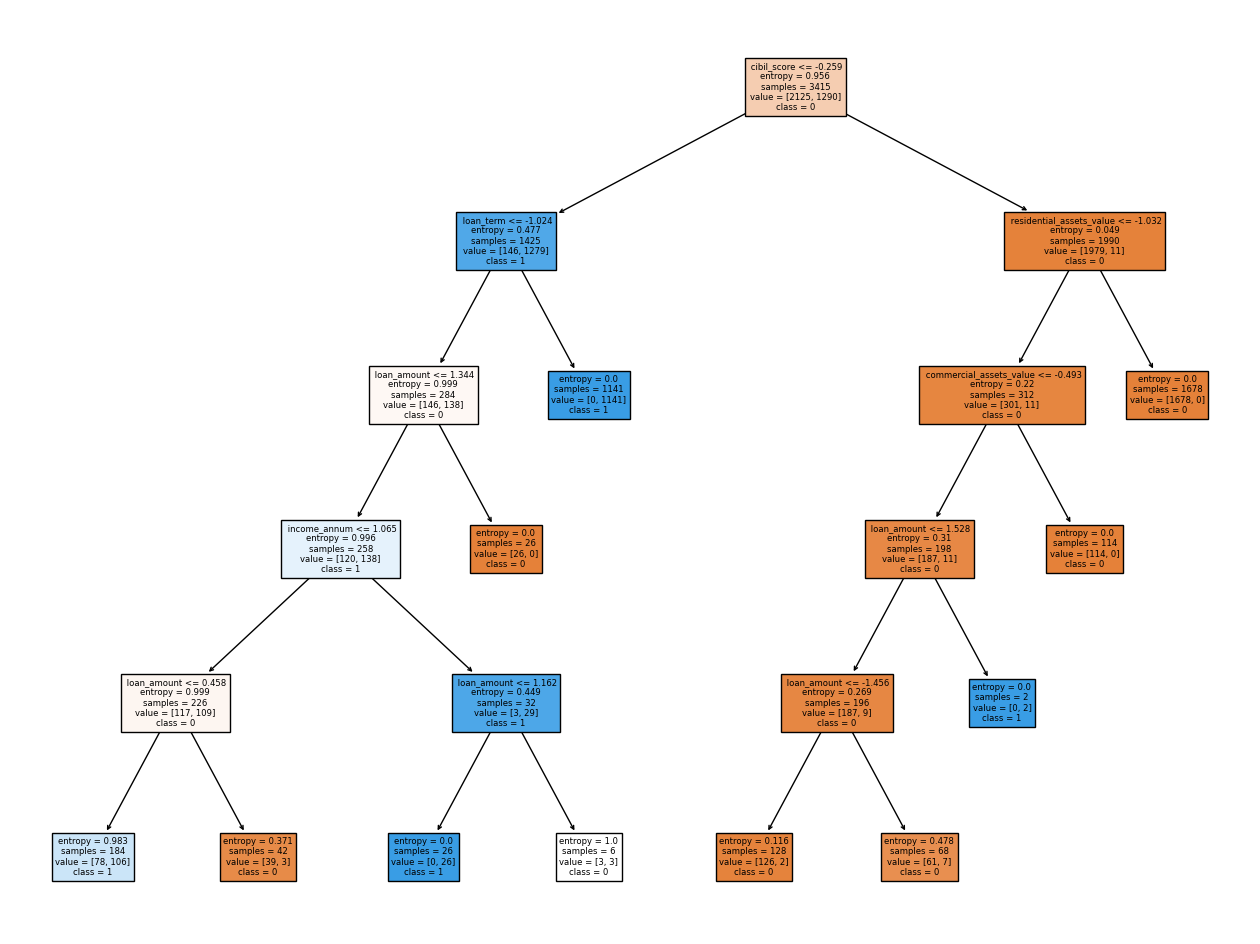

In [89]:
plt.figure(figsize=(16,12))
tree.plot_tree(DTC,feature_names=t,class_names=['0', '1'], filled=True)
plt.show()

# RandomForestClassifier

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
RFC=RandomForestClassifier(n_estimators=200)

In [98]:
RFC

RandomForestClassifier(n_estimators=200)

In [99]:
RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [100]:
RFC_pred=RFC.predict(x_test)

In [102]:
RFC_pred[:5]

array([0, 0, 0, 0, 0])

In [104]:
confusion_matrix(y_test,RFC_pred)

array([[523,   8],
       [  8, 315]], dtype=int64)

In [105]:
from sklearn.metrics import accuracy_score, f1_score

In [106]:
accuracy_score(y_test,RFC_pred)

0.9812646370023419

In [107]:
f1_score(y_test,RFC_pred)

0.9752321981424149